In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tempfile import TemporaryFile

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Emergency_Vehicles/train.csv")

In [ ]:
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/Emergency_Vehicles/train/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)

X=np.array(X)

# New Section

In [ ]:
y = data.emergency_or_not.values

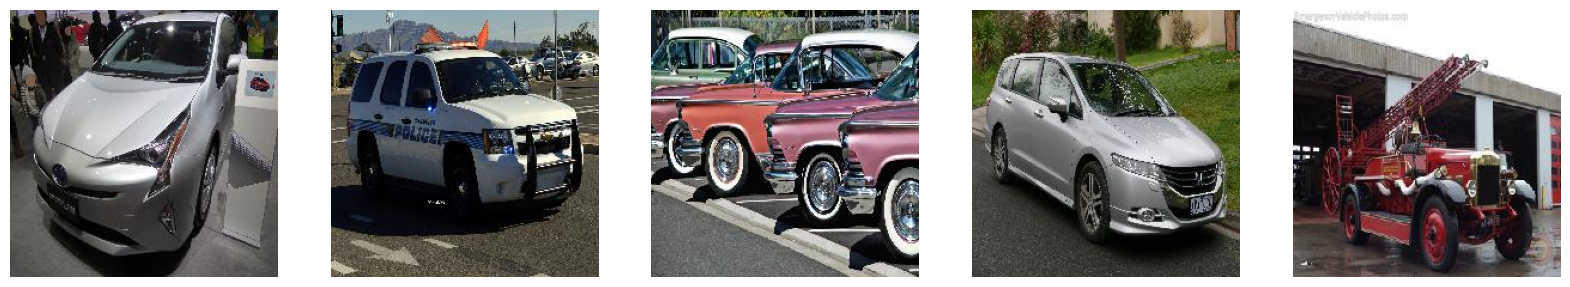

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [ ]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=45)
#shape of traing and validation dataset
(X_train.shape,y_train.shape),(X_valid.shape,y_valid.shape)

(((1152, 224, 224, 3), (1152,)), ((494, 224, 224, 3), (494,)))

In [ ]:
final_train_data=[]
final_target_data=[]
for i in tqdm(range(X_train.shape[0])):
    #original image
    final_train_data.append(X_train[i])
    #rotating the image
    final_train_data.append(rotate(X_train[i], angle=30, mode = 'edge'))
    #rotating left-right
    final_train_data.append(np.fliplr(X_train[i]))
    #rotating up-down
    final_train_data.append(np.flipud(X_train[i]))

    for j in range(5):
        final_target_data.append(y_train[i])

100%|██████████| 1152/1152 [00:10<00:00, 111.46it/s]


In [ ]:
final_train=np.array(final_train_data)
final_target_train=np.array(final_target_data)
# shape of new training set
final_train.shape, final_target_train.shape
((5760, 224, 224, 3), (5760,))
# visualizing the augmented images


((5760, 224, 224, 3), (5760,))

In [ ]:
final_train = final_train.reshape(final_train.shape[0], 224*224*3)
final_train.shapefinal_train = final_train.reshape(final_train.shape[0], 224*224*3)
final_train.shape

(4608, 150528)

In [ ]:
final_valid = X_valid.reshape(X_valid.shape[0], 224*224*3)
final_valid.shape

(494, 150528)

In [ ]:
np.savez("/content/drive/MyDrive/Emergency_Vehicles/temp1.npz", x=final_train, y=final_target_data)

np.savez("/content/drive/MyDrive/Emergency_Vehicles/temp2.npz", x=final_valid, y=y_valid)

In [ ]:

npzfile2 = np.load("/content/drive/MyDrive/Emergency_Vehicles/temp2.npz")

In [ ]:
final_train=npzfile2['x']
final_target_train=npzfile2['y']

final_valid=npzfile2['x']
y_valid=npzfile2['y']

In [ ]:
adam = tf.keras.optimizers.Adam(lr=1e-5)
# using relu as activation function in hidden layer
model=Sequential()
model.add(layers.InputLayer(input_shape=(224*224*3,)))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_history=model.fit(final_train,final_target_train,epochs=50,batch_size=150,validation_data=(final_valid,y_valid))

Epoch 1/50
4/4 [==============================] - 5s 946ms/step - loss: 1.1862 - accuracy: 0.5648 - val_loss: 0.6572 - val_accuracy: 0.5850
Epoch 2/50
4/4 [==============================] - 2s 630ms/step - loss: 0.7596 - accuracy: 0.6296 - val_loss: 0.6669 - val_accuracy: 0.5668
Epoch 3/50
4/4 [==============================] - 4s 1s/step - loss: 0.7617 - accuracy: 0.6032 - val_loss: 0.6688 - val_accuracy: 0.5668
Epoch 4/50
4/4 [==============================] - 3s 893ms/step - loss: 0.6888 - accuracy: 0.6417 - val_loss: 0.6703 - val_accuracy: 0.5668
Epoch 5/50
4/4 [==============================] - 2s 585ms/step - loss: 0.7269 - accuracy: 0.6255 - val_loss: 0.6738 - val_accuracy: 0.5668
Epoch 6/50
4/4 [==============================] - 2s 642ms/step - loss: 0.7378 - accuracy: 0.5951 - val_loss: 0.6754 - val_accuracy: 0.5668
Epoch 7/50
4/4 [==============================] - 2s 583ms/step - loss: 0.7012 - accuracy: 0.6154 - val_loss: 0.6771 - val_accuracy: 0.5668
Epoch 8/50
4/4 [=======

In [ ]:
model.save('/content/drive/MyDrive/Emergency_Vehicles/emergencyModel.h5')

NameError: name 'model' is not defined

# New Section

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Emergency_Vehicles/model1.h5')

In [ ]:
img = plt.imread('/content/bus image.jpeg')
# normalizing the pixel values
img = img/255
img.shape

(148, 268, 3)

In [ ]:
from skimage.transform import resize
img = resize(img, (32,32,3))
img=np.asarray(img)[None,...]

In [ ]:
predicted_probabilities = model.predict(img)

1/1 [==============================] - 0s 26ms/step


In [ ]:
if predicted_probabilities[0][0] > 0.5:
  print("Emergency")
else:
  print("Non-Emergency")

Non-Emergency
